### Importing the necessary libraries


In [1]:
#importing data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#model building libraries
from sklearn.model_selection import train_test_split

The data manipulation libraries are used to perform sanity checks on the data while the data visualization librares are used for plotting graphs

---
### Importing the dataset

In [2]:
#reading the data
df = pd.read_csv('/content/drive/MyDrive/10academy/telecom.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
#creating a copy of the data
data = df.copy()
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


The *df* dataframe contains the original data while the *data* dataframe contains a copy of the data. The reason for this is so that the original copy of the DataFrame that remains unchanged even if the new one is modified.


---
### Data sanity checks

*shape of the data*

In [4]:
#checking the shape of the data
shape = df.shape
print('The dataframe contains', shape [0], 'rows and', shape[1] ,'columns')

The dataframe contains 150001 rows and 55 columns


*missing values*

In [5]:
#checking null values in the dataframe
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Numerous columns have missing values. The column with the largest number of missing values is Nb of sec with 37500B < Vol UL with 130254 missing values


---
*Datatypes of the columns*

In [6]:
#checking different datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

There are 50 columns with float datatype in the dataframe and 5 columns with object datatype in the dataframe.

---

*statistical summary of the dataframe*

In [7]:
#describing the numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bearer Id,149010.0,1.013887e+19,2.893173e+18,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05


In [8]:
# describing object columns
df.describe(include = 'object').T

,count,unique,top,freq
Start,150000,9997,4/26/2019 7:25,203
End,150000,6403,4/25/2019 0:01,1150
Last Location Name,148848,45547,D41377B,80
Handset Manufacturer,149429,170,Apple,59565
Handset Type,149429,1396,Huawei B528S-23A,19752


### Univariet analysis
Here, univariet analysis is done before filling the missing values to get a feel of the data and understand it well before modifying it.

---
Getting the distribution of handsets usage among customers

In [9]:
#getting the valuecount of  handset types
handset_count = df['Handset Type'].value_counts()
handset_count[0:11]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

The output above shows the top 10 handsets. The most used handset is Huawei B528S-23A  with 19752 people using the handset.

The number of undefined handsets used is 8987

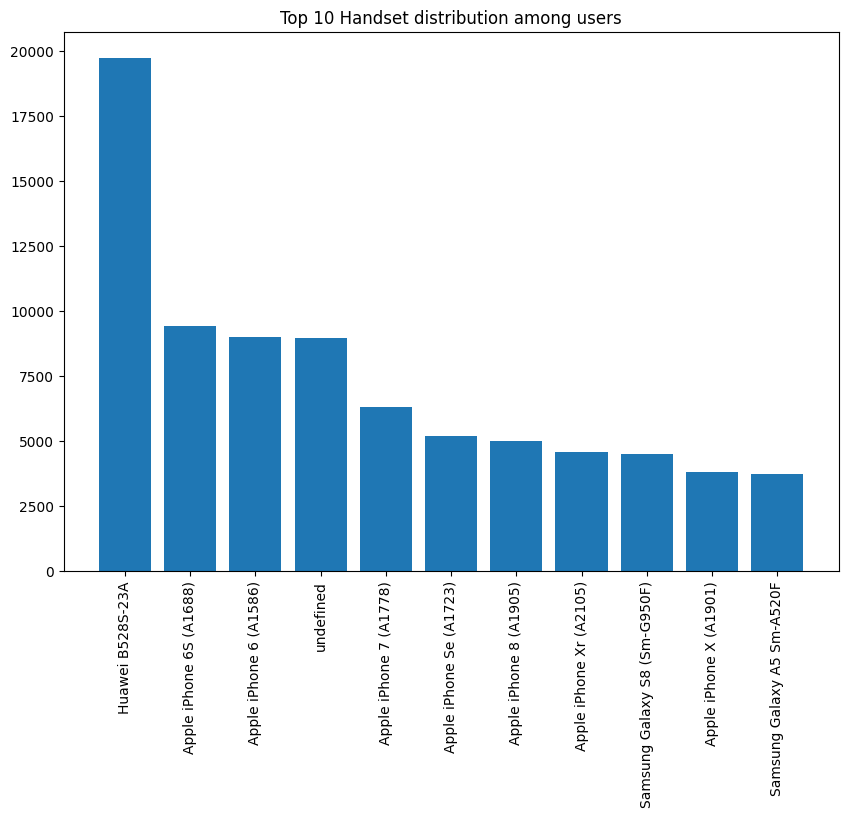

In [10]:
#plotting the handset type distribution
plt.figure(figsize = (10, 7))
plt.bar(handset_count.index[:11], handset_count.values[:11])
plt.xticks(rotation = 90)
plt.title('Top 10 Handset distribution among users')
plt.show()

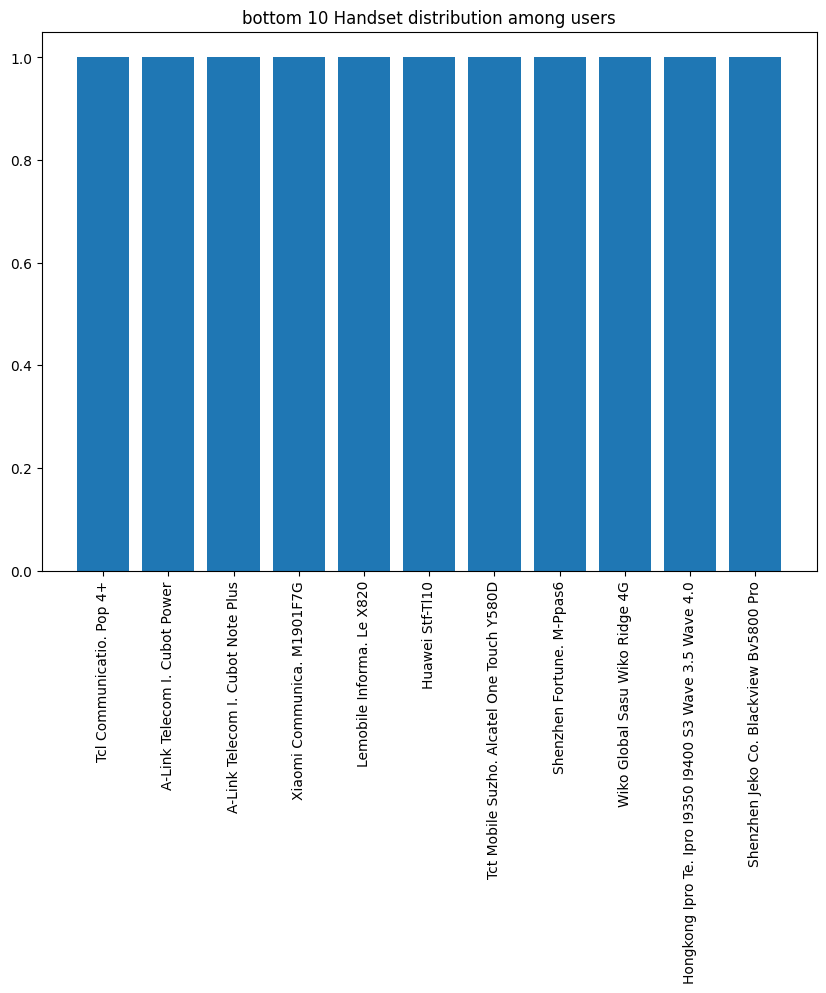

In [11]:
#checking the bottom 10 handset distribution

plt.figure(figsize = (10, 7))
plt.bar(handset_count.index[-11:], handset_count.values[-11:])
plt.xticks(rotation = 90)
plt.title('bottom 10 Handset distribution among users')
plt.show()

**Getting the top 3 handset manufacturer**

In [12]:
#getting the top3 handset manufacturer
top_3 = df['Handset Manufacturer'].value_counts()
print('The top 3 handset manufacturers are: \n',top_3[:3])

The top 3 handset manufacturers are: 
 Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


**Getting the top 5 handsets per top 3 manufacturers**

*Apple*

In [13]:
#getting the top 5 handsets of apple
apple_handsets = df.loc[df['Handset Manufacturer'] == 'Apple', 'Handset Type'].value_counts()
print('The top 5 apple handsets include: \n', apple_handsets[:5])

The top 5 apple handsets include: 
 Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64


*samsung*

In [14]:
#getting the top 5 handsets in samsang
samsung_handsets = df.loc[df['Handset Manufacturer']== 'Samsung', 'Handset Type'].value_counts()
print('The top 5 samsung handsets include: \n', samsung_handsets[:5])

The top 5 samsung handsets include: 
 Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64


*Huawei*

In [15]:
#getting the top 5 handsets in huawei
hua_hand = df.loc[df['Handset Manufacturer']== 'Huawei', 'Handset Type'].value_counts()
print('The top 5 Huawei handsets include: \n', hua_hand[:5])

The top 5 Huawei handsets include: 
 Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


From the above output, I think that the company should invest on Huawei B528S-23A model only. The reasons for this are:
> - It is the top most handset used by people.

The analysis have shown that the other Huawei handset models are performing poorly leaving the B528S-23A as the only best performing handset type when it comes to Huawei

When It comes to apple, it seems like their handsets have an equal popularity when we comapre them to each other. The company should invest in the following models
> - Apple iPhone 6S (A1688) which has  9419 users
> - Apple iPhone 6 (A1586)  which has   9023 users
> - Apple iPhone 7 (A1778)  which has   6326 users

These are the top best performing apple models

The company should invest in  the Samsung Galaxy S8 (Sm-G950F) model. This is the top most Samsung handset when it comes to popularity. It has  4520 users

**Agreggating per user the number of XDR sessions**

In [16]:
#grouping the number of XDR sessions per user
xdr_group = pd.DataFrame(df.groupby('MSISDN/Number')['Bearer Id'].count())
xdr_group.rename(columns = {'Bearer Id':'number_of_sessions'}, inplace = True)
print(xdr_group)

               number_of_sessions
MSISDN/Number                    
3.360100e+10                    1
3.360100e+10                    1
3.360100e+10                    1
3.360101e+10                    1
3.360101e+10                    2
...                           ...
3.379000e+10                    1
3.379000e+10                    1
3.197021e+12                    1
3.370000e+14                    1
8.823971e+14                    1

[106856 rows x 1 columns]


**Agregating the total session duration per user**

In [17]:
#grouping the total duration of xdr session per user
session_tot = pd.DataFrame(df.groupby('MSISDN/Number')['Dur. (ms)'].sum())
session_tot.rename(columns = {'Dur. (ms)':'total_of_sessions'}, inplace = True)
print(session_tot)

               total_of_sessions
MSISDN/Number                   
3.360100e+10            116720.0
3.360100e+10            181230.0
3.360100e+10            134969.0
3.360101e+10             49878.0
3.360101e+10             37104.0
...                          ...
3.379000e+10              8810.0
3.379000e+10            140988.0
3.197021e+12            877385.0
3.370000e+14            253030.0
8.823971e+14            869844.0

[106856 rows x 1 columns]


**Agregating the total DL per user**

In [18]:
#grouping the total dl per user
dl_tot = pd.DataFrame(df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum())
dl_tot.rename(columns = {'Total DL (Bytes)':'total_dl'}, inplace = True)
print(dl_tot)

                   total_dl
MSISDN/Number              
3.360100e+10   8.426375e+08
3.360100e+10   1.207552e+08
3.360100e+10   5.566597e+08
3.360101e+10   4.019932e+08
3.360101e+10   1.363130e+09
...                     ...
3.379000e+10   6.879252e+08
3.379000e+10   4.445751e+08
3.197021e+12   1.948281e+08
3.370000e+14   5.396350e+08
8.823971e+14   7.869760e+07

[106856 rows x 1 columns]


**Agregating the total UL per user**

In [19]:
#grouping the total dl per user
ul_tot = pd.DataFrame(df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum())
ul_tot.rename(columns = {'Total uL (Bytes)':'total_ul'}, inplace = True)
print(ul_tot)

               Total UL (Bytes)
MSISDN/Number                  
3.360100e+10         36053108.0
3.360100e+10         36104459.0
3.360100e+10         39306820.0
3.360101e+10         20327526.0
3.360101e+10         94280527.0
...                         ...
3.379000e+10         26716429.0
3.379000e+10         35732243.0
3.197021e+12         37295915.0
3.370000e+14         56652839.0
8.823971e+14         60456049.0

[106856 rows x 1 columns]


**Getting the total data volume for each application for the users**

*Summation of various DL and UL columns*

In [20]:
#adding 'Social Media DL (Bytes)' and 'Social Media UL (Bytes)'
df['social_tot'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']

#adding google dl and ul total
df['goog_tot'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']

#Emai
df['Email_tot'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']

#youtube
df['you_tot'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']

#netflix
df['netflix_tot'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']

#gaming
df['gaming_tot'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']

#other
df['other_tot'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


*Grouping per session*

In [21]:
#grouping the users dl & ul per social media
xdr_soc = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['social_tot'].sum())
print(xdr_soc)

                            social_tot
MSISDN/Number Bearer Id               
3.360100e+10  1.311448e+19   2232135.0
              7.349883e+18   2660565.0
              7.349883e+18   3195623.0
3.360101e+10  1.304243e+19    280294.0
              7.277826e+18   1524057.0
...                                ...
3.379000e+10  1.304243e+19    300183.0
              1.311448e+19    498569.0
3.197021e+12  7.277826e+18    715224.0
3.370000e+14  7.349883e+18    521566.0
8.823971e+14  7.277826e+18   1546088.0

[147028 rows x 1 columns]


In [22]:
#grouping the users dl & ul per google
xdr_goog = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['goog_tot'].sum())
print(xdr_goog)

                              goog_tot
MSISDN/Number Bearer Id               
3.360100e+10  1.311448e+19   4389005.0
              7.349883e+18   5334863.0
              7.349883e+18   3443126.0
3.360101e+10  1.304243e+19   9678493.0
              7.277826e+18  10170635.0
...                                ...
3.379000e+10  1.304243e+19   7531269.0
              1.311448e+19   5429705.0
3.197021e+12  7.277826e+18  10438660.0
3.370000e+14  7.349883e+18   9830617.0
8.823971e+14  7.277826e+18   9218647.0

[147028 rows x 1 columns]


In [23]:
#grouping the users dl & ul per Email
xdr_em = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['Email_tot'].sum())
print(xdr_em)

                            Email_tot
MSISDN/Number Bearer Id              
3.360100e+10  1.311448e+19  1331362.0
              7.349883e+18  3307781.0
              7.349883e+18  3205380.0
3.360101e+10  1.304243e+19  2284670.0
              7.277826e+18  1413685.0
...                               ...
3.379000e+10  1.304243e+19  1006915.0
              1.311448e+19  2514097.0
3.197021e+12  7.277826e+18  1520771.0
3.370000e+14  7.349883e+18  3318582.0
8.823971e+14  7.277826e+18  3330974.0

[147028 rows x 1 columns]


In [24]:
#grouping the users dl & ul per youtube
xdr_you = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['you_tot'].sum())
print(xdr_you)

                               you_tot
MSISDN/Number Bearer Id               
3.360100e+10  1.311448e+19  21624548.0
              7.349883e+18  12432223.0
              7.349883e+18  21333570.0
3.360101e+10  1.304243e+19   6977321.0
              7.277826e+18  20492482.0
...                                ...
3.379000e+10  1.304243e+19  26647843.0
              1.311448e+19  19851572.0
3.197021e+12  7.277826e+18  11959905.0
3.370000e+14  7.349883e+18  36734940.0
8.823971e+14  7.277826e+18  40940710.0

[147028 rows x 1 columns]


In [25]:
#grouping the users dl & ul per netflix
xdr_net = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['netflix_tot'].sum())
print(xdr_net)

                            netflix_tot
MSISDN/Number Bearer Id                
3.360100e+10  1.311448e+19   27180981.0
              7.349883e+18   11221763.0
              7.349883e+18   19353900.0
3.360101e+10  1.304243e+19    1942092.0
              7.277826e+18   21973110.0
...                                 ...
3.379000e+10  1.304243e+19   14902538.0
              1.311448e+19    8531060.0
3.197021e+12  7.277826e+18   26592300.0
3.370000e+14  7.349883e+18   30905042.0
8.823971e+14  7.277826e+18   28846230.0

[147028 rows x 1 columns]


In [26]:
#grouping the users dl & ul per gaming
xdr_game = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['gaming_tot'].sum())
print(xdr_game)

                             gaming_tot
MSISDN/Number Bearer Id                
3.360100e+10  1.311448e+19  812458661.0
              7.349883e+18  119750078.0
              7.349883e+18  538827713.0
3.360101e+10  1.304243e+19  391126127.0
              7.277826e+18  802565189.0
...                                 ...
3.379000e+10  1.304243e+19  660361359.0
              1.311448e+19  437003292.0
3.197021e+12  7.277826e+18  178048738.0
3.370000e+14  7.349883e+18  510142695.0
8.823971e+14  7.277826e+18   43070260.0

[147028 rows x 1 columns]


In [27]:
#grouping the users dl & ul per others
xdr_other = pd.DataFrame(df.groupby(['MSISDN/Number', 'Bearer Id'])['other_tot'].sum())
print(xdr_other)

                              other_tot
MSISDN/Number Bearer Id                
3.360100e+10  1.311448e+19  386570872.0
              7.349883e+18  281710071.0
              7.349883e+18  501693672.0
3.360101e+10  1.304243e+19   35279702.0
              7.277826e+18   85988660.0
...                                 ...
3.379000e+10  1.304243e+19  295282817.0
              1.311448e+19  211115113.0
3.197021e+12  7.277826e+18  470526473.0
3.370000e+14  7.349883e+18  149188439.0
8.823971e+14  7.277826e+18  401360457.0

[147028 rows x 1 columns]


### EDA

---
**Missing value treatment**

In [28]:
#getting the missing values
df.isnull().sum()

Bearer Id      991
Start            1
Start ms         1
End              1
End ms           1
              ... 
Email_tot        0
you_tot          0
netflix_tot      0
gaming_tot       0
other_tot        0
Length: 62, dtype: int64

In [29]:
#filling the numeric missing values with the mean


def fill_na(df):
  """
  A function that takes a column,
  checks if the column is numeric
  it then takes the mean of the column
  fills missing values in the column with the mean
  """
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      col_mean = df[col].mean()
      df[col].fillna(value = col_mean, inplace = True)


  return df


#applying the function
df_fill = fill_na(df)

print('*' * 50)
df_fill.isnull().sum()


**************************************************


Bearer Id      0
Start          1
Start ms       0
End            1
End ms         0
              ..
Email_tot      0
you_tot        0
netflix_tot    0
gaming_tot     0
other_tot      0
Length: 62, dtype: int64

**Bivariet Analysis**

In [30]:
#other
df['all_tot'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


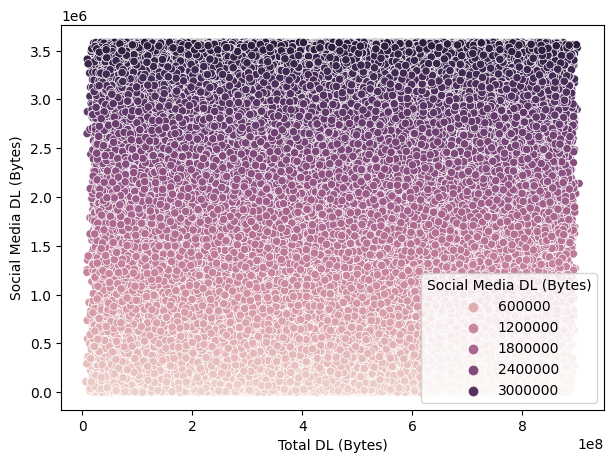

In [31]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = df, x = 'Total DL (Bytes)', y='Social Media DL (Bytes)', hue = 'Social Media DL (Bytes)')
plt.show()

**Decile rank**

In [32]:
#getting the variables we need
df_sess = df[['MSISDN/Number','Dur. (ms)', 'all_tot']]
#grouping by msisdn
sess_group = pd.DataFrame(df_sess.groupby('MSISDN/Number')['Dur. (ms)'].sum())

#performing the decile cut
sess_group['decile'] = pd.qcut(sess_group['Dur. (ms)'], q = [0.1, 0.2,0.3,0.4,0.5,1], labels=False)
print(sess_group)

                  Dur. (ms)  decile
MSISDN/Number                      
3.360100e+10   1.167200e+05     4.0
3.360100e+10   1.812300e+05     4.0
3.360100e+10   1.349690e+05     4.0
3.360101e+10   4.987800e+04     0.0
3.360101e+10   3.710400e+04     0.0
...                     ...     ...
3.379000e+10   1.409880e+05     4.0
4.188282e+10   7.255100e+07     4.0
3.197021e+12   8.773850e+05     4.0
3.370000e+14   2.530300e+05     4.0
8.823971e+14   8.698440e+05     4.0

[106857 rows x 2 columns]


In [33]:
#merging the two df to get get a df with the variables we need
df_merg = pd.merge(sess_group, df_sess[['all_tot', 'MSISDN/Number']], on = 'MSISDN/Number')
df_merg.head()

,MSISDN/Number,Dur. (ms),decile,all_tot
0,3.360100e+10,116720.0,4.0,878690574.0
1,3.360100e+10,181230.0,4.0,156859643.0
2,3.360100e+10,134969.0,4.0,595966483.0
3,3.360101e+10,49878.0,0.0,422320698.0
4,3.360101e+10,37104.0,0.0,871832580.0


In [34]:
#grouping the df_merge per class
df_merg_sum = pd.DataFrame(df_merg.groupby('decile')['all_tot'].sum())
df_merg_sum

,all_tot
decile,
0.0,6.110082e+12
1.0,6.536402e+12
2.0,6.034241e+12
3.0,5.144182e+12
4.0,4.510168e+13


*Correlation matrix*

In [35]:
#selection of columns
df_corr = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']]

#getting the correlation
correl = df_corr.corr()
print(correl)

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

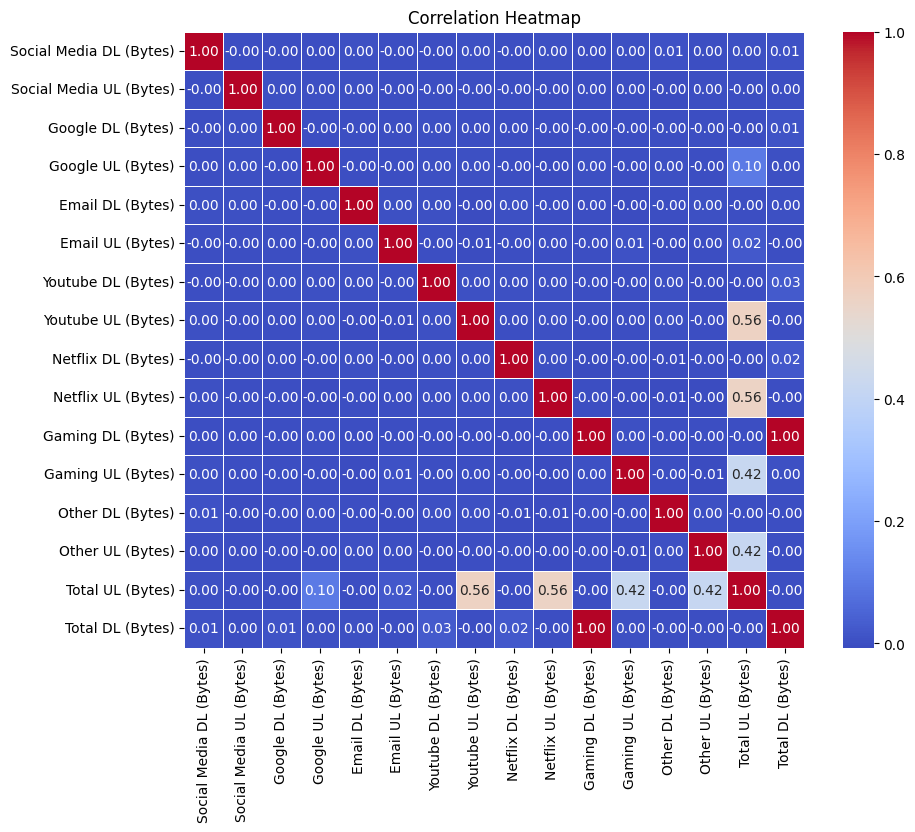

In [36]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
#getting the columns
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [38]:
#applications to track
social_media =df[['Bearer Id','Social Media DL (Bytes)','Social Media UL (Bytes)' ,'Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']]
# List of columns related to xDR data
xDR_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

#adding the sessions into a column
social_media['Is_xDR_Session'] = social_media[xDR_columns].sum(axis=1)


print(social_media.head())


      Bearer Id  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0  1.311448e+19                1545765.0                  24420.0   
1  1.311448e+19                1926113.0                   7165.0   
2  1.311448e+19                1684053.0                  42224.0   
3  1.311448e+19                 644121.0                  13372.0   
4  1.311448e+19                 862600.0                  50188.0   

   Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
0          1634479.0          1271433.0         3563542.0          137762.0   
1          3493924.0           920172.0          629046.0          308339.0   
2          8535055.0          1694064.0         2690151.0          672973.0   
3          9023734.0          2788027.0         1439754.0          631229.0   
4          6248284.0          1500559.0         1936496.0          173853.0   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0    

<ipython-input-38-c14e9c143958>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_media['Is_xDR_Session'] = social_media[xDR_columns].sum(axis=1)


In [39]:
#grouping the bearer Id and the sum column to get the number of sessions per user
session_per_user = social_media.groupby('Bearer Id')['Is_xDR_Session'].sum()
print(session_per_user)

Bearer Id
6.917538e+18    1.213178e+09
6.917538e+18    1.249851e+09
6.917538e+18    1.342862e+09
6.917538e+18    8.996960e+08
6.917538e+18    1.332063e+09
                    ...     
1.318654e+19    8.765870e+08
1.318654e+19    7.944525e+08
1.318654e+19    1.605869e+09
1.318654e+19    4.446182e+08
1.318654e+19    8.136509e+08
Name: Is_xDR_Session, Length: 134709, dtype: float64


**Converting text columns to numeric columns**

In [44]:
df_text = df.select_dtypes(include = 'object')
df_text.columns

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [45]:
#getting the handset manufacturer unique values
df['Handset Manufacturer'].unique()

array(['Samsung', 'undefined', 'Huawei', 'Apple', 'Zte',
       'TP-Link Technologies Co Ltd', 'Ertebat Hamrah Guya Arvand',
       'Wiko Global Sasu', nan, 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Zebra Technologies Corp.',
       'Nokia', 'Wiko', 'Tcl Communication Ltd', 'ZTE', 'Lenovo',
       'Asustek', 'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'Tp-Link Technologies Co Ltd', 'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Sona

In [46]:
#getting the unique values of handset type
df['Handset Type'].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

**scaling the dataset**

In [43]:
scaler = StandardScaler()

# Getting the numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Scaling the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns = df_numeric.columns)
df_scaled.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Total UL (Bytes),Total DL (Bytes),social_tot,goog_tot,Email_tot,you_tot,netflix_tot,gaming_tot,other_tot,all_tot
0,1.031911,0.938332,0.566475,21.213047,-0.008932,-0.003370,-0.578959,-0.121206,-1.654637e-01,-0.553863,...,-0.387668,-0.597047,-0.249184,-1.393860,1.346461,-0.463680,-0.515444,-0.565147,-1.022770,-0.614351
1,1.031911,-0.915382,0.372095,15.554551,0.012569,-0.003363,-0.566766,-0.080087,-1.654637e-01,-0.554155,...,1.124409,0.814043,0.101413,-0.964961,-1.233975,1.807728,1.396959,0.735957,0.462841,0.865130
2,1.031911,-1.726165,0.531765,15.513311,-0.061789,-0.003331,-0.589672,0.000000,-4.642269e-17,-0.554572,...,-1.173927,-0.716127,-0.098464,0.688721,1.030731,1.274148,0.121220,-0.821054,-0.059428,-0.769595
3,1.031911,-0.045696,-1.137819,15.016588,-0.011065,-0.003335,-0.586315,0.000000,-4.642269e-17,-0.552987,...,0.195366,1.603109,-1.130464,1.138794,-0.175631,1.502285,-0.813756,1.557480,1.366694,1.610557
4,1.031911,0.228030,1.580027,12.147531,-0.011108,-0.003355,-0.584063,0.000000,-4.642269e-17,-0.554572,...,-0.228656,0.468971,-0.883956,-0.016623,-0.138878,1.252196,-0.549500,0.413508,0.555991,0.457962


In [ ]:
#performing pca on the numeric columns
#initializing the pca
